# Sephora Product Success Analytics

## Focus: Product & Consumer Insights (Beauty Strategy)

## Business Goal

Sephora has thousands of skincare products. This project analyzes product metadata and customer reviews to understand:

- What drives high-performing skincare products
- What factors predict customer satisfaction
- How review sentiment can guide product strategy

Dataset: Sephora Products + Skincare Reviews (Kaggle)

In [91]:
from nltk.util import ngrams #build word phrases
from nltk.tokenize import word_tokenize #split text into tokens
nltk.download("punkt_tab") #tokenizer for splitting text into words
def top_phrases(text, n=2, top_k=15): #helper to pull top n-grams
    tokens = word_tokenize(text.lower()) #split into words
    tokens = [t for t in tokens if t.isalpha()] #keep only real words
    tokens = [t for t in tokens if t not in stop_words] #remove stopwords
    phrases = [" ".join(p) for p in ngrams(tokens, n)] #build phrases
    return Counter(phrases).most_common(top_k) #return top phrases

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/adrianacruz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [92]:
from nltk.corpus import stopwords
from collections import Counter

import re #txt cleaning
import os #lets python work with files on computer
import pandas as pd #load pandas -- to work w/datasets
import matplotlib.pyplot as plt #make charts
import nltk

#consolidate review files
review_files = [f for f in os.listdir("../raw_data") if "reviews" in f]

df_reviews = pd.concat(
    [pd.read_csv(f"../raw_data/{f}") for f in review_files],
    ignore_index=True
)

df_reviews = df_reviews.drop(columns=["Unnamed: 0"], errors="ignore")
df_reviews.shape

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
custom_stopwords = {
    "really", "very", "using","first", "feel", "feels", "got", "try", "excited", "sample", "full", "size", "next", "day", "week", "weeks", "much", "work", "works", "time", "well", "definitely", "products", "makeup", "cream","first" "used", "even", "recommend"," after","would", "tried", "reviews","made", "wanted", "like", "great", "good",
    "love", "product", "skin", "one", "also", "just"
}

stop_words = stop_words.union(custom_stopwords)

os.getcwd() #show folder notebook is currently running in
os.listdir("..") #lists everything one folder level above notebooks
os.listdir("../raw_data") #lists raw dataset files we downloaded

pd.set_option("display.max_columns",None) #show every column

df_products = pd.read_csv("../raw_data/product_info.csv") #go up one folder to get into raw data, then load product info
df_products.head() #show first 5 lines to confirm it loaded

/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_99815/2311635122.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(f"../raw_data/{f}") for f in review_files],
/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_99815/2311635122.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(f"../raw_data/{f}") for f in review_files],
/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_99815/2311635122.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(f"../raw_data/{f}") for f in review_files],
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrianacruz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [94]:
df_products.shape #how many rows & colums
df_products.columns #column names
df_products.dtypes #which columns are numbers vs txt
(df_products.isna().mean()*100).sort_values(ascending=False).head(10) #top columns w/missing values

sale_price_usd       96.821286
value_price_usd      94.690370
variation_desc       85.283730
child_max_price      67.577113
child_min_price      67.577113
highlights           25.983047
size                 19.201789
variation_value      18.813280
variation_type       17.000235
tertiary_category    11.655286
dtype: float64

In [95]:
df_products["price_usd"].isna().mean()  #check how often regular price is missing
df_products["price_usd"].describe()  #see typical Sephora price ranges

count    8494.000000
mean       51.655595
std        53.669234
min         3.000000
25%        25.000000
50%        35.000000
75%        58.000000
max      1900.000000
Name: price_usd, dtype: float64

In [96]:
df_products["loves_count"].describe()  #see distribution of product popularity
df_products["loves_count"].quantile(0.75)  #find top 25% cutoff for loves

#only the top 25% most-loved products have more than 26,841 loves

26841.25

In [97]:
#created high_performer to answer "which products are the winners" after checking the rating, love counts and reviews

df_products["high_performer"] = (
    (df_products["rating"] >= 4.2) &  #strong customer satisfaction
    (df_products["reviews"] >= 50) &  #enough reviews to trust rating
    (df_products["loves_count"] >= 26841)  #top 25% most popular products
).astype(int)  #convert True/False into 1/0

In [98]:
#check if our definition actually created a reasonable number of "successful" products

df_products["high_performer"].value_counts()  #count how many winners vs non-winners

high_performer
0    7252
1    1242
Name: count, dtype: int64

In [99]:
#what percent of sephora's catalog is truly high performing?

df_products["high_performer"].mean()  #see percent of products labeled high performing

0.14622086178478927

In [100]:
#do high-performing products cost more?

df_products.groupby("high_performer")["price_usd"].mean()  #compare average price for winners vs non-winners

high_performer
0    53.180583
1    42.751232
Name: price_usd, dtype: float64

In [101]:
df_products.groupby("high_performer")["rating"].mean()  #compare satisfaction levels

high_performer
0    4.149434
1    4.447636
Name: rating, dtype: float64

## Next question:
Are winners concentrated in certain categories (like moisturizers, serums, cleansers)?

In [102]:
#who are the winners?
df_products[df_products["high_performer"] == 1]["secondary_category"].value_counts().head(10)  #see which categories produce the most winners

secondary_category
Face                         175
Lip                          146
Eye                          135
Women                        100
Treatments                    91
Cheek                         79
Moisturizers                  78
Cleansers                     69
Hair Styling & Treatments     68
Brushes & Applicators         52
Name: count, dtype: int64

In [103]:
#which categories are most likely to succeed?
df_products.groupby("secondary_category")["high_performer"].mean().sort_values(ascending=False).head(10)  #see categories with highest success rate

secondary_category
Makeup Palettes           0.550000
Cheek                     0.478788
Lip                       0.355231
Lip Balms & Treatments    0.311475
Bath & Body               0.285714
Masks                     0.271084
Face                      0.265554
Brushes & Applicators     0.211382
Treatments                0.195279
Cleansers                 0.191136
Name: high_performer, dtype: float64

## Next business question:
Which brands consistently create high-performing products?

In [104]:
#brands w/most winners

df_products[df_products["high_performer"] == 1]["brand_name"].value_counts().head(10)  #top brands by number of winners

brand_name
SEPHORA COLLECTION             56
Anastasia Beverly Hills        37
Dior                           31
Fenty Beauty by Rihanna        29
Hourglass                      26
CLINIQUE                       24
Rare Beauty by Selena Gomez    23
tarte                          23
The Ordinary                   21
Urban Decay                    21
Name: count, dtype: int64

In [105]:
#brands with highest success rate

df_products.groupby("brand_name")["high_performer"].mean().sort_values(ascending=False).head(10)  #brands most likely to succeed

brand_name
Christian Louboutin            1.000000
MERIT                          0.700000
HAUS LABS BY LADY GAGA         0.666667
Evian                          0.666667
Rosebud Perfume Co.            0.666667
Youth To The People            0.592593
Rare Beauty by Selena Gomez    0.575000
Glow Recipe                    0.551724
Atelier Cologne                0.500000
Kaja                           0.500000
Name: high_performer, dtype: float64

In [106]:
#Filter brands with enough products + build a real “Top Sephora Brands” leaderboard.
brand_summary = df_products.groupby("brand_name").agg(
    total_products=("product_id", "count"),  #count how many products each brand has
    winner_count=("high_performer", "sum"),  #count how many winners each brand has
    success_rate=("high_performer", "mean")  #percent of products that are winners
).reset_index()  #turn results into a clean table

In [107]:
#filter for brands w/enough products
brand_summary_filtered = brand_summary[brand_summary["total_products"] >= 10]  #keep only brands with 10+ products

In [108]:
#top brands by true success rate
brand_summary_filtered.sort_values("success_rate", ascending=False).head(10)  #top reliable brands

,brand_name,total_products,winner_count,success_rate
162,MERIT,10,7,0.700000
107,HAUS LABS BY LADY GAGA,12,8,0.666667
280,Youth To The People,27,16,0.592593
216,Rare Beauty by Selena Gomez,40,23,0.575000
100,Glow Recipe,29,16,0.551724
152,LYS Beauty,12,6,0.500000
139,Kaja,20,10,0.500000
196,PATRICK TA,31,15,0.483871
85,Farmacy,30,14,0.466667
239,Summer Fridays,16,7,0.437500


In [109]:
brand_summary["total_products"].describe()  #see typical brand catalog sizes

count    304.000000
mean      27.940789
std       31.778780
min        1.000000
25%        9.000000
50%       19.000000
75%       39.000000
max      352.000000
Name: total_products, dtype: float64

In [110]:
brand_summary["total_products"].quantile([0.5, 0.75, 0.9])  #see realistic cutoffs

0.50    19.0
0.75    39.0
0.90    56.0
Name: total_products, dtype: float64

In [111]:
#Emerging Brand Leaders (10+ Products)
top_brands_mid = brand_summary[brand_summary["total_products"] >= 10]  #keep brands with meaningful catalog size
top_brands_mid.sort_values("success_rate", ascending=False).head(10)  #top brands with reliable success rates

,brand_name,total_products,winner_count,success_rate
162,MERIT,10,7,0.700000
107,HAUS LABS BY LADY GAGA,12,8,0.666667
280,Youth To The People,27,16,0.592593
216,Rare Beauty by Selena Gomez,40,23,0.575000
100,Glow Recipe,29,16,0.551724
152,LYS Beauty,12,6,0.500000
139,Kaja,20,10,0.500000
196,PATRICK TA,31,15,0.483871
85,Farmacy,30,14,0.466667
239,Summer Fridays,16,7,0.437500


In [112]:
#Reliable Brand Leaders (20+ Products)
top_brands_mid = brand_summary[brand_summary["total_products"] >= 20]  #keep brands with meaningful catalog size
top_brands_mid.sort_values("success_rate", ascending=False).head(10)  #top brands with reliable success rates

,brand_name,total_products,winner_count,success_rate
280,Youth To The People,27,16,0.592593
216,Rare Beauty by Selena Gomez,40,23,0.575000
100,Glow Recipe,29,16,0.551724
139,Kaja,20,10,0.500000
196,PATRICK TA,31,15,0.483871
85,Farmacy,30,14,0.466667
150,LANEIGE,27,11,0.407407
9,Anastasia Beverly Hills,95,37,0.389474
255,The Ordinary,54,21,0.388889
234,Sol de Janeiro,43,16,0.372093


In [113]:
#Reliable Brand Leaders (40+ Products)
top_brands_mid = brand_summary[brand_summary["total_products"] >= 40]  #keep brands with big catalog size
top_brands_mid.sort_values("success_rate", ascending=False).head(10)  #top brands with reliable success rates

,brand_name,total_products,winner_count,success_rate
216,Rare Beauty by Selena Gomez,40,23,0.575000
9,Anastasia Beverly Hills,95,37,0.389474
255,The Ordinary,54,21,0.388889
234,Sol de Janeiro,43,16,0.372093
263,Urban Decay,59,21,0.355932
87,Fenty Beauty by Rihanna,82,29,0.353659
155,Laura Mercier,55,18,0.327273
89,First Aid Beauty,42,13,0.309524
24,Bobbi Brown,55,17,0.309091
250,Tatcha,52,16,0.307692


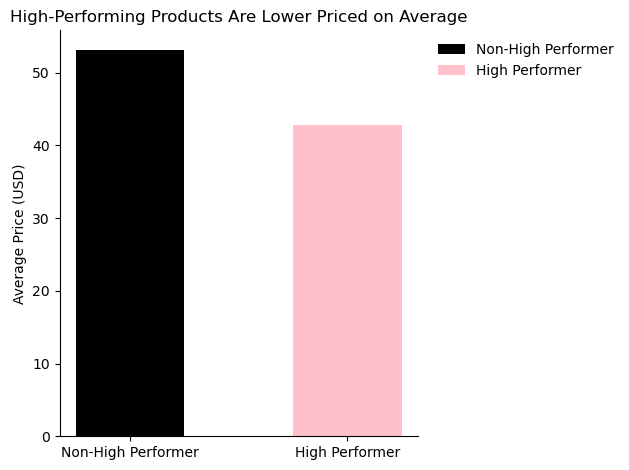

In [114]:
#chart 1 -- Do winners cost more?

#average price for winners vs non-winners
#average price for winners vs non-winners
price_summary = df_products.groupby("high_performer")["price_usd"].mean()

#make bar chart manually so legend matches colors
plt.bar(
    ["Non-High Performer", "High Performer"],  #short clean labels
    price_summary.values,
    color=["black", "pink"],
    label=["Non-High Performer", "High Performer"],
    width =.5
)

#title + axis labels
plt.title("High-Performing Products Are Lower Priced on Average")
plt.ylabel("Average Price (USD)")

#legend stacked (top item then bottom item)
plt.legend(
    ["Non-High Performer", "High Performer"],
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    frameon=False
)

#remove extra borders
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

In [115]:
#Chart 2 — Which Categories Are Most Likely to Produce Winners?

#category success rate = % of products in category that are high performers
category_success = (
    df_products.groupby("secondary_category")["high_performer"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

category_success  #preview top 10 categories

secondary_category
Makeup Palettes           0.550000
Cheek                     0.478788
Lip                       0.355231
Lip Balms & Treatments    0.311475
Bath & Body               0.285714
Masks                     0.271084
Face                      0.265554
Brushes & Applicators     0.211382
Treatments                0.195279
Cleansers                 0.191136
Name: high_performer, dtype: float64

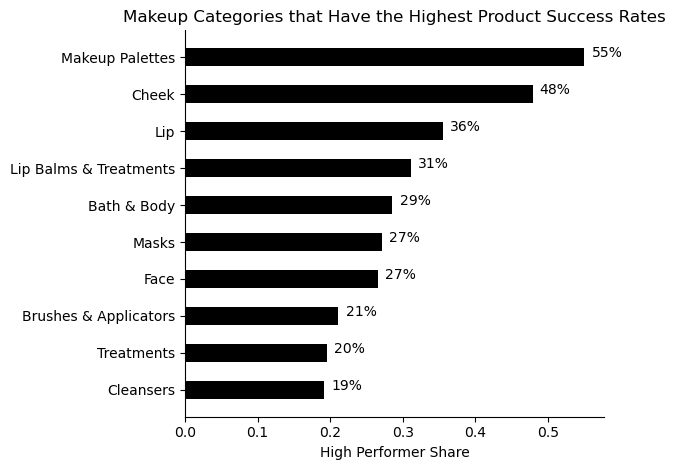

In [116]:
#top 10 categories by success rate
category_success = (
    df_products.groupby("secondary_category")["high_performer"]
    .mean()
    .sort_values(ascending=True)  #ascending so best ends up on top
    .tail(10)
)

#horizontal bar chart
plt.barh(
    category_success.index,       #category names
    category_success.values,      #success rates
    color=["black"],               #color
    height=0.5                    #bar thickness
)

#title + axis label
plt.title("Makeup Categories that Have the Highest Product Success Rates")
plt.xlabel("High Performer Share")

#add exact % labels on bars
for i, v in enumerate(category_success.values):
    plt.text(v + 0.01, i, f"{v:.0%}")  #shows%  #show value next to bar

#remove extra borders
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

In [117]:
#Chart 3 — Top Brands by High-Performer Rate (20+ Products)

top_brands = (
    brand_summary[brand_summary["total_products"] >= 20]
    .sort_values("success_rate", ascending=False)
    .head(10)
)
top_brands

,brand_name,total_products,winner_count,success_rate
280,Youth To The People,27,16,0.592593
216,Rare Beauty by Selena Gomez,40,23,0.575000
100,Glow Recipe,29,16,0.551724
139,Kaja,20,10,0.500000
196,PATRICK TA,31,15,0.483871
85,Farmacy,30,14,0.466667
150,LANEIGE,27,11,0.407407
9,Anastasia Beverly Hills,95,37,0.389474
255,The Ordinary,54,21,0.388889
234,Sol de Janeiro,43,16,0.372093


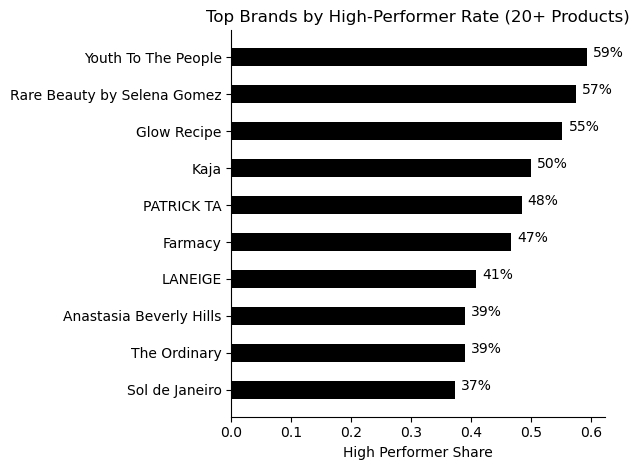

In [118]:
#top 10 brands (20+ products), ordered for plotting
top_brands = (
    brand_summary[brand_summary["total_products"] >= 20]
    .sort_values("success_rate", ascending=False)
    .head(10)
    .sort_values("success_rate", ascending=True)
)

#horizontal bar chart
plt.barh(
    top_brands["brand_name"],
    top_brands["success_rate"],
    color=["black"],
    height=0.5
)

plt.title("Top Brands by High-Performer Rate (20+ Products)")
plt.xlabel("High Performer Share")

#add percent labels
for i, v in enumerate(top_brands["success_rate"]):
    plt.text(v + 0.01, i, f"{v:.0%}")

#clean borders
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

In [119]:
#Emerging Brand Leaders (Top 5)
emerging = brand_summary[
    (brand_summary["total_products"] >= 10) &
    (brand_summary["total_products"] < 20)
].sort_values("success_rate", ascending=False).head(5)

emerging

,brand_name,total_products,winner_count,success_rate
162,MERIT,10,7,0.700000
107,HAUS LABS BY LADY GAGA,12,8,0.666667
152,LYS Beauty,12,6,0.500000
239,Summer Fridays,16,7,0.437500
225,Saie,17,7,0.411765


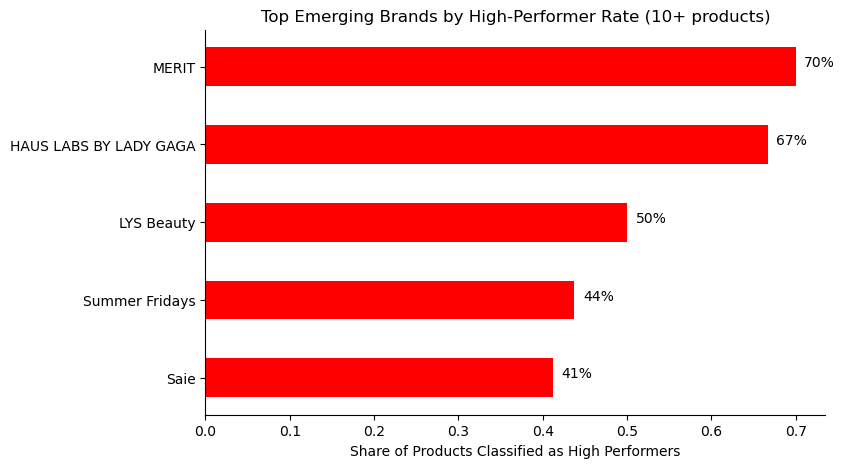

In [120]:
#sort emerging brands so highest success appears at top
emerging_sorted = emerging.sort_values("success_rate", ascending=True)  #order bars properly

#chart -- Emerging brands with highest success rate
plt.figure(figsize=(8,5))  #set chart size

#plot horizontal bars
plt.barh(
    emerging_sorted["brand_name"],  #brand names on y-axis
    emerging_sorted["success_rate"],  #success rate on x-axis
    color="red",
    height=.5
)

#add value labels at end of bars
for i, v in enumerate(emerging_sorted["success_rate"]):
    plt.text(v + 0.01, i, f"{v:.0%}")  #show percent next to bar

#title + axis label
plt.title("Top Emerging Brands by High-Performer Rate (10+ products)")  #main takeaway
plt.xlabel("Share of Products Classified as High Performers")  #metric explanation

#clean style (remove extra borders)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()  #render chart

In [121]:
#Established Brand Leaders (20–49 products)
established = brand_summary[
    (brand_summary["total_products"] >= 20) &
    (brand_summary["total_products"] < 50)
].sort_values("success_rate", ascending=False).head(5)

established

,brand_name,total_products,winner_count,success_rate
280,Youth To The People,27,16,0.592593
216,Rare Beauty by Selena Gomez,40,23,0.575000
100,Glow Recipe,29,16,0.551724
139,Kaja,20,10,0.500000
196,PATRICK TA,31,15,0.483871


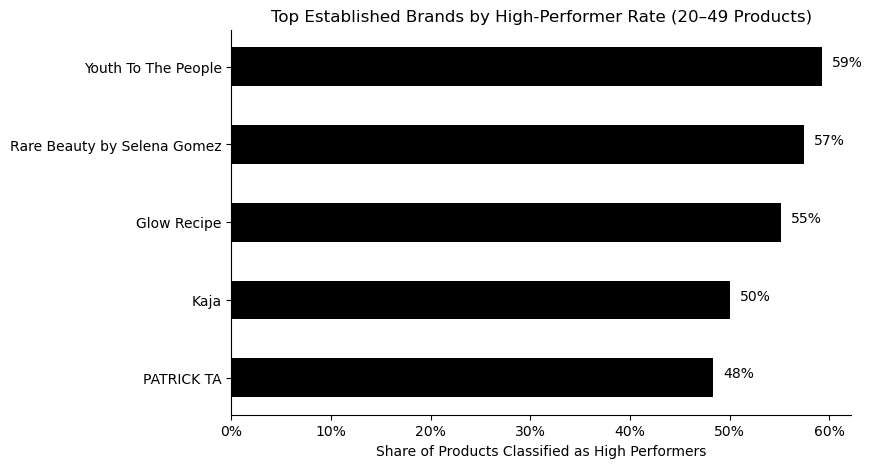

In [122]:
#sort established brands so highest success appears at top
established_sorted = established.sort_values("success_rate", ascending=True)  #order bars properly

#chart -- Established brands with highest success rate
plt.figure(figsize=(8,5))  #set chart size

#plot horizontal bars
plt.barh(
    established_sorted["brand_name"],  #brand names on y-axis
    established_sorted["success_rate"],  #success rate on x-axis
    color="black",  #mid-tier color for established brands
    height=.5
)

#add value labels at end of bars
for i, v in enumerate(established_sorted["success_rate"]):
    plt.text(v + 0.01, i, f"{v:.0%}")  #show percent next to bar

#title + axis label
plt.title("Top Established Brands by High-Performer Rate (20–49 Products)")  #executive takeaway
plt.xlabel("Share of Products Classified as High Performers")  #metric explanation

#format x-axis as percentages
plt.gca().xaxis.set_major_formatter(lambda x, _: f"{x:.0%}")  #convert decimals to %

#clean style (remove extra borders)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()  #render chart


In [123]:
#Powerhouse Brand Leaders (50+ products)
powerhouse = brand_summary[
    brand_summary["total_products"] >= 50  #only large brands
].sort_values("success_rate", ascending=False).head(5)  #top 5 performers

powerhouse

,brand_name,total_products,winner_count,success_rate
9,Anastasia Beverly Hills,95,37,0.389474
255,The Ordinary,54,21,0.388889
263,Urban Decay,59,21,0.355932
87,Fenty Beauty by Rihanna,82,29,0.353659
155,Laura Mercier,55,18,0.327273


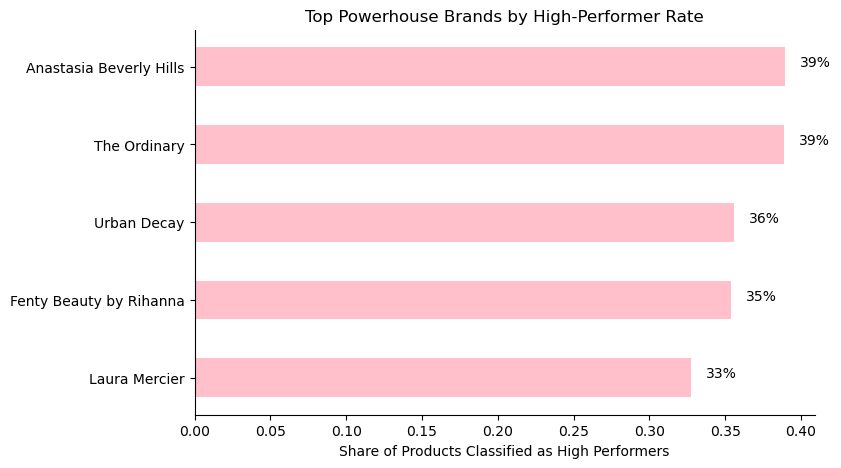

In [149]:
#sort powerhouse brands so highest success appears at top
powerhouse_sorted = powerhouse.sort_values("success_rate", ascending=True)  #order bars properly

#chart -- Powerhouse brands with highest success rate
plt.figure(figsize=(8,5))  #set chart size

#plot horizontal bars
plt.barh(
    powerhouse_sorted["brand_name"],  #brand names on y-axis
    powerhouse_sorted["success_rate"],  #success rate on x-axis
    color="pink",  #strong color for major brands
    height=.5
)

#add value labels at end of bars
for i, v in enumerate(powerhouse_sorted["success_rate"]):
    plt.text(v + 0.01, i, f"{v:.0%}")  #show percent next to bar

#title + axis label
plt.title("Top Powerhouse Brands by High-Performer Rate")  #executive takeaway
plt.xlabel("Share of Products Classified as High Performers")  #metric explanation

#clean style (remove extra borders)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()  #render chart


## 4th Question
What are customers consistently praising or complaining about in high-performing products?

In [125]:
#load each review file and stack them together
df_reviews = pd.concat(
    [pd.read_csv(f"../raw_data/{file}") for file in review_files],
    ignore_index=True
)

df_reviews.shape  #check final dataset size

/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_99815/3411310191.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(f"../raw_data/{file}") for file in review_files],
/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_99815/3411310191.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(f"../raw_data/{file}") for file in review_files],
/var/folders/yl/dycm0z354471sh5pch1k624w0000gn/T/ipykernel_99815/3411310191.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(f"../raw_data/{file}") for file in review_files],


(1094411, 19)

In [126]:
df_reviews = df_reviews.drop(columns=["Unnamed: 0"])  #remove useless column

In [127]:
#check how many reviews we have
df_reviews.shape  #see number of rows and columns

(1094411, 18)

In [128]:
#confirm review txt coverage
df_reviews["review_text"].isna().mean()  #check % of missing review text

0.0013194311826178649

In [131]:
#create a simple sentiment label
df_reviews["sentiment"] = df_reviews["rating"].apply(
    lambda x: "positive" if x >= 4 else ("negative" if x <= 2 else "neutral")
)  #label reviews by satisfaction level

In [132]:
#merge reviews with product winners

#attach high_performer label onto reviews
df_reviews = df_reviews.merge(
    df_products[["product_id", "high_performer"]],
    on="product_id",
    how="left"
)

In [133]:
custom_stopwords.update({
    #sampling/incentives
    "received", "free", "sample", "complimentary", "influenster",

    #review boilerplate
    "honest", "review", "exchange", "testing", "purposes","use", "penny"

    #rating language
    "stars", "gave", "two",

    #generic phrases
    "little", "bit", "goes", "long", "way"
})

stop_words = stop_words.union(custom_stopwords)

In [134]:
df_reviews_clean = df_reviews[
    ~df_reviews["review_text"].str.contains(
        "free sample|complimentary|influenster|exchange",
        case=False,
        na=False
    )
]

In [137]:
text_pos = " ".join(
    df_reviews_clean[df_reviews_clean["sentiment"]=="positive"]["review_text"]
    .dropna()
)

text_neg = " ".join(
    df_reviews_clean[df_reviews_clean["sentiment"]=="negative"]["review_text"]
    .dropna()
)

In [138]:
winner_reviews = df_reviews[df_reviews["high_performer"] == 1]

In [139]:
top_phrases(text_pos, n=3, top_k=15)

[('worth every penny', 4717),
 ('leaves face feeling', 3913),
 ('leaves feeling soft', 3619),
 ('vitamin c serum', 3496),
 ('oily acne prone', 2716),
 ('sensitive acne prone', 2707),
 ('fine lines wrinkles', 2562),
 ('leaves feeling clean', 2459),
 ('leave white cast', 2229),
 ('never looked better', 1980),
 ('noticed huge difference', 1870),
 ('lines around eyes', 1759),
 ('leave face feeling', 1653),
 ('fine lines around', 1616),
 ('best moisturizer ever', 1615)]

In [140]:
top_phrases(text_neg, n=3, top_k=15)

[('sensitive acne prone', 401),
 ('vitamin c serum', 355),
 ('oily acne prone', 323),
 ('get past smell', 255),
 ('left face feeling', 219),
 ('bring back old', 212),
 ('worth price tag', 202),
 ('back old formula', 182),
 ('give zero stars', 175),
 ('leaves white cast', 169),
 ('please bring back', 161),
 ('went back normal', 159),
 ('used entire bottle', 158),
 ('used whole bottle', 158),
 ('peter thomas roth', 155)]

In [141]:
#buildpositiveandnegativecorpora(fromcleanreviews)
pos_series = df_reviews_clean.loc[df_reviews_clean["sentiment"]=="positive", "review_text"].dropna().astype(str) #keeppositivecleantext
neg_series = df_reviews_clean.loc[df_reviews_clean["sentiment"]=="negative", "review_text"].dropna().astype(str) #keepnegativecleantext

text_pos = " ".join(pos_series) #combinepositiveintoonebigstring
text_neg = " ".join(neg_series) #combinenegativeintoonebigstring

In [142]:
#extracttopphrasesfromeachsentiment
pos_phr = top_phrases(text_pos, n=3, top_k=200) #toppositive3-wordphrases
neg_phr = top_phrases(text_neg, n=3, top_k=200) #topnegative3-wordphrases

In [143]:
#turnphraselistsintodataframes
pos_df = pd.DataFrame(pos_phr, columns=["phrase","pos_count"]) #positivephrasecounts
neg_df = pd.DataFrame(neg_phr, columns=["phrase","neg_count"]) #negativephrasecounts

#findoverlappingphrases(appearINboth)
overlap = pos_df.merge(neg_df, on="phrase", how="inner") #keeponlysharedphrases

#rankoverlapby"sharedimportance"
overlap["overlap_score"] = overlap[["pos_count","neg_count"]].min(axis=1) #highonlyifbothsidesuseit
overlap = overlap.sort_values("overlap_score", ascending=False) #largestshareddriversfirst

overlap.head(15) #previewtopshareddrivers

,phrase,pos_count,neg_count,overlap_score
3,sensitive acne prone,2707,401,401
1,vitamin c serum,3496,355,355
2,oily acne prone,2716,323,323
10,left face feeling,1399,219,219
27,worth price tag,593,202,202
42,leaves white cast,460,169,169
9,peter thomas roth,1421,155,155
0,leaves face feeling,3913,153,153
21,acne prone sensitive,777,134,134
5,leave white cast,2229,131,131


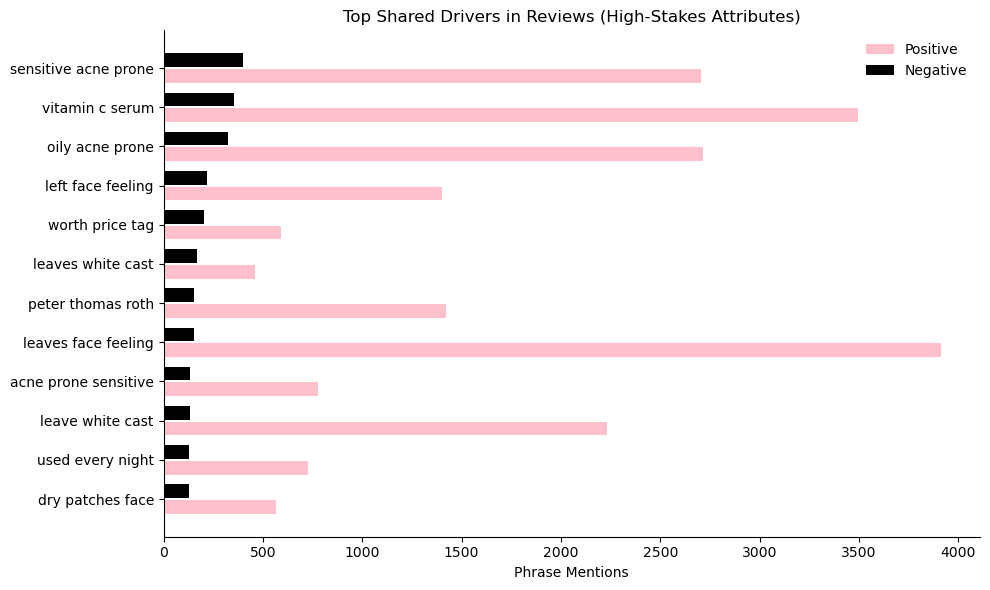

In [148]:
#plot shared drivers of loveANDcomplaints
top_n = 12 #howmanyphrasesyouwanttoshow
plot_df = overlap.head(top_n).copy() #selecttopsharedphrases
plot_df = plot_df.sort_values("overlap_score", ascending=True) #sortfornicebarh(top-to-bottom)

plt.figure(figsize=(10, 6)) #roomforphrases
y = range(len(plot_df)) #ypositions

#twobarsperphrase(side-by-side)
plt.barh([i - 0.2 for i in y], plot_df["pos_count"], height=0.35, color="pink", label="Positive") #positivebar
plt.barh([i + 0.2 for i in y], plot_df["neg_count"], height=0.35, color="black", label="Negative") #negativebar

plt.yticks(y, plot_df["phrase"]) #labelphrases
plt.title("Top Shared Drivers in Reviews (High-Stakes Attributes)") #executivestory
plt.xlabel("Phrase Mentions") #xaxismeaning
plt.legend(frameon=False) #cleanlegend
color=["black", "pink"]

#cleanborders
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout() #avoidcutoff
plt.show()